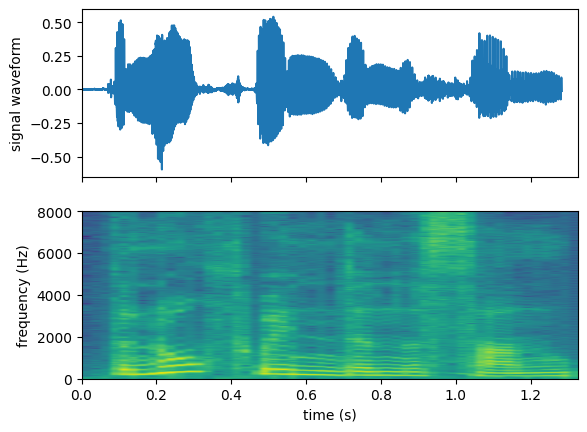

In [1]:
import ffmpegio as ff
import numpy as np

from scipy.signal import ShortTimeFFT, get_window
from matplotlib import pyplot as plt


audiofile = "the_north_wind_and_the_sun.wav"
fs, x = ff.audio.read(audiofile, ac=1, ar=16000, sample_fmt="flt")
x = x[:, 0]
nb_samples = len(x)
t = np.arange(nb_samples) / fs

nperseg = int(0.05 * fs)
SFT = ShortTimeFFT(win=get_window("hamming", nperseg), hop=nperseg // 2, fs=fs)
Sxx_dB = 10 * np.log10(SFT.spectrogram(x))

plt.subplots(2, 1, sharex=True)
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.ylabel("signal waveform")
plt.subplot(2, 1, 2)
plt.imshow(Sxx_dB, extent=SFT.extent(nb_samples), aspect="auto", origin="lower")
plt.xlabel("time (s)")
_ = plt.ylabel("frequency (Hz)")

2024-06-17 14:59:01.638763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 14:59:02.560318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-17 14:59:03.497898: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 14:59:03.716864: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required li

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


Text(0.5, 0, 'time (s)')

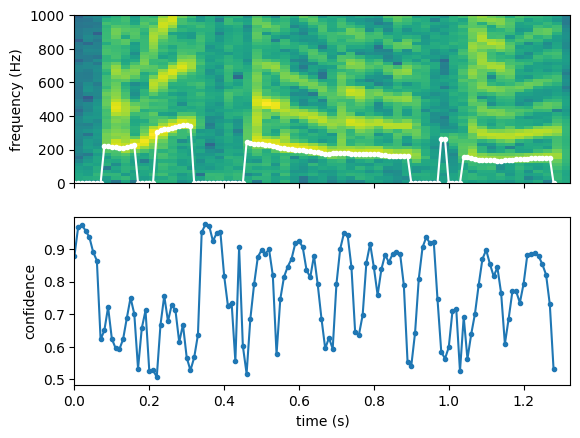

In [2]:
import conf_cuda
import ml_pitch_models

t_f0, f0, conf = ml_pitch_models.predict(x, fs, "crepe_large")

plt.subplots(2, 1, sharex=True)
plt.subplot(2, 1, 1)
plt.imshow(Sxx_dB, extent=SFT.extent(nb_samples), aspect="auto", origin="lower")
plt.plot(t_f0, f0, ".-w")
plt.ylabel("frequency (Hz)")
plt.ylim([0, 1000])
plt.subplot(2, 1, 2)
plt.plot(t_f0, conf, ".-")
plt.ylabel("confidence")
plt.xlabel("time (s)")

Text(0.5, 0, 'time (s)')

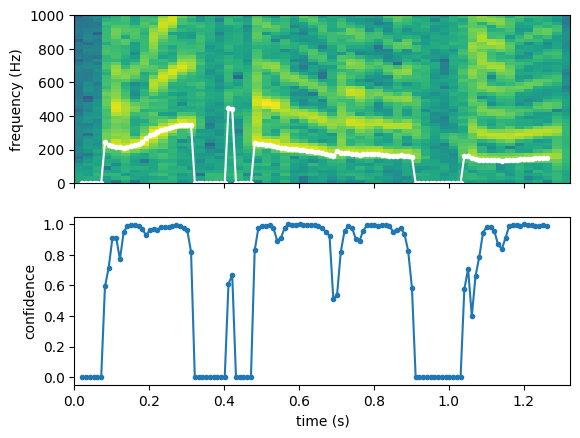

In [3]:
import parselmouth as pm

sound = pm.Sound(x,fs)
pitch = sound.to_pitch()

plt.subplots(2, 1, sharex=True)
plt.subplot(2, 1, 1)
plt.imshow(Sxx_dB, extent=SFT.extent(nb_samples), aspect="auto", origin="lower")
plt.plot(pitch.ts(), pitch.selected_array['frequency'], ".-w")
plt.ylabel("frequency (Hz)")
plt.ylim([0, 1000])
plt.subplot(2, 1, 2)
plt.plot(pitch.ts(), pitch.selected_array['strength'], ".-")
plt.ylabel("confidence")
plt.xlabel("time (s)")

Text(0.5, 0, 'time (s)')

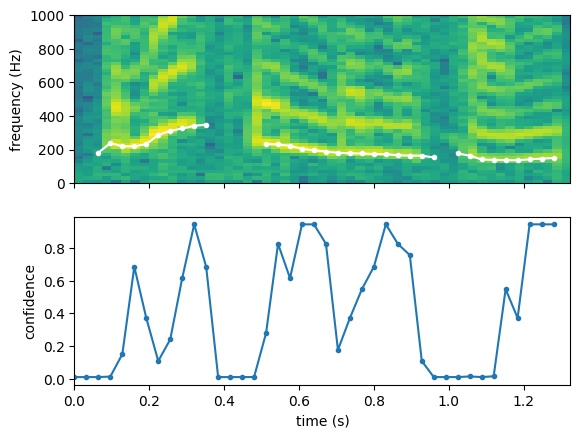

In [4]:
import librosa

f0_lr, _, conf_lr = librosa.pyin(x, fmin=75, fmax=600, sr=fs)
t_lr = librosa.times_like(f0_lr, sr=fs)


plt.subplots(2, 1, sharex=True)
plt.subplot(2, 1, 1)
plt.imshow(Sxx_dB, extent=SFT.extent(nb_samples), aspect="auto", origin="lower")
plt.plot(t_lr, f0_lr, ".-w")
plt.ylabel("frequency (Hz)")
plt.ylim([0, 1000])
plt.subplot(2, 1, 2)
plt.plot(t_lr, conf_lr, ".-")
plt.ylabel("confidence")
plt.xlabel("time (s)")